In [1]:
import numpy as np
import pandas as pd

## (1) example

In [2]:
def bootstrap_method_1(arr, f, N_bootstrap):
    sample_stat = f(arr)
    bootstrap_samples = [np.random.choice(arr, size=len(arr), replace=True) for i in range(N_bootstrap)]
    result = [2*sample_stat - f(trial) for trial in bootstrap_samples]
    return sample_stat, result

def bootstrap_method_2(arr, f, N_bootstrap):
    sample_stat = f(arr)
    bootstrap_samples = [np.random.choice(arr, size=len(arr), replace=True) for i in range(N_bootstrap)]
    result = [f(trial) for trial in bootstrap_samples]
    return sample_stat, result

In [3]:
arr=np.array([30,37,36,43,42,48,43,46,41,42])

In [4]:
mu, res = bootstrap_method_1(arr, np.mean, 200)
print("sample mean:", np.mean(arr))
print("[2.5%, 97.5%]: [{}, {}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample mean: 40.8
[2.5%, 97.5%]: [38.099999999999994, 43.50249999999999]


In [5]:
mu, res = bootstrap_method_2(arr, np.mean, 200)
print("sample mean:", np.mean(arr))
print("[2.5%, 97.5%]: [{}, {}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample mean: 40.8
[2.5%, 97.5%]: [37.4975, 43.705000000000005]


## (2) experiment: Assume Normal Distribution N(2.71, 3.14**2)

In [6]:
arr = np.random.normal(2.71, 3.14, 20)

In [7]:
mu, res = bootstrap_method_1(arr, np.mean, 200)
print("sample mean: {0:.3f}".format(np.mean(arr)))
print("[2.5%, 97.5%]: [{0:.3f}, {1:.3f}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample mean: 3.345
[2.5%, 97.5%]: [2.366, 4.357]


In [8]:
mu, res = bootstrap_method_2(arr, np.mean, 200)
print("sample mean: {0:.3f}".format(np.mean(arr)))
print("[2.5%, 97.5%]: [{0:.3f}, {1:.3f}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample mean: 3.345
[2.5%, 97.5%]: [2.314, 4.330]


In [9]:
mu, res = bootstrap_method_1(arr, np.median, 200)
print("sample median: {0:.3f}".format(np.median(arr)))
print("[2.5%, 97.5%]: [{0:.3f}, {1:.3f}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample median: 2.494
[2.5%, 97.5%]: [1.004, 3.104]


In [10]:
mu, res = bootstrap_method_1(arr, np.std, 200)
print("sample std: {0:.3f}".format(np.std(arr)))
print("[2.5%, 97.5%]: [{0:.3f}, {1:.3f}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample std: 2.591
[2.5%, 97.5%]: [1.977, 3.839]


## (3) experiment: exponential distribution

In [11]:
arr = np.random.exponential(2, 10)

In [12]:
mu, res = bootstrap_method_1(arr, np.mean, 200)
print("sample mean: {0:.3f}".format(np.mean(arr)))
print("[2.5%, 97.5%]: [{0:.3f}, {1:.3f}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample mean: 2.113
[2.5%, 97.5%]: [1.132, 3.174]


<AxesSubplot:ylabel='Frequency'>

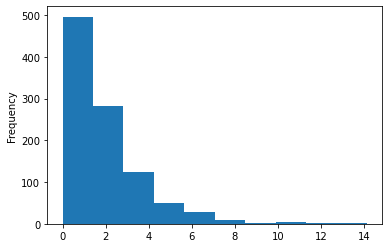

In [13]:
pd.Series(np.random.exponential(2, 1000)).plot.hist()

## (4) experiment: possion distribution

In [14]:
arr = np.random.poisson(2, 10)

In [15]:
mu, res = bootstrap_method_1(arr, np.mean, 200)
print("sample mean: {0:.3f}".format(np.mean(arr)))
print("[2.5%, 97.5%]: [{0:.3f}, {1:.3f}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample mean: 2.000
[2.5%, 97.5%]: [1.100, 2.900]


<AxesSubplot:ylabel='Frequency'>

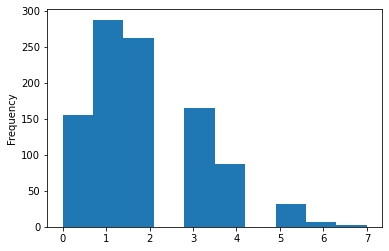

In [16]:
pd.Series(np.random.poisson(2, 1000)).plot.hist()

## (5) t 检验：回到N(2.71, 3.14**2)

In [17]:
arr = np.random.normal(2.71, 3.14, 10)

In [18]:
arr

array([-0.20608035, -2.05688682,  3.88523324,  4.28472948, -1.38797124,
        6.70363707,  1.6548653 ,  1.99966824,  9.08703611,  3.00799249])

In [19]:
from scipy import stats

In [20]:
stats.ttest_1samp(arr, 0)

Ttest_1sampResult(statistic=2.437494339266986, pvalue=0.037518520835967115)

In [21]:
t_ci = stats.t.ppf(1-0.05/2, len(arr)-1)

In [22]:
ste = stats.sem(arr)

In [23]:
t_ci

2.2621571627409915

In [24]:
"[{0:.3f},{1:.3f}]".format(np.mean(arr) - t_ci * ste, np.mean(arr) + t_ci * ste)

'[0.194,5.200]'

In [25]:
mu, res = bootstrap_method_1(arr, np.mean, 200)
print("sample mean: {0:.3f}".format(np.mean(arr)))
print("[2.5%, 97.5%]: [{0:.3f}, {1:.3f}]".format(np.percentile(res, 2.5), np.percentile(res, 97.5)))

sample mean: 2.697
[2.5%, 97.5%]: [0.644, 4.638]
